# EDA

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 2105)
pd.set_option('display.max_rows',500)

In [3]:
# read in cleaned checkpoint
games = pd.read_csv('../Data/Created/MLBgames.csv')

/var/folders/5t/bq10hvbn0zncjrr_1ppk5kp40000gn/T/ipykernel_29546/1970991845.py:2: DtypeWarning: Columns (81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  games = pd.read_csv('../Data/Created/MLBgames.csv')


In [4]:
games.head()

,date,visitor_team,v_league,v_game_num,home_team,h_league,h_game_num,v_runs,h_runs,total_outs,day_night,park_id,attndnce,game_mins,v_abs,v_hits,v_2b,v_3b,v_hr,v_rbis,v_sacbunt,v_sacfly,v_hbp,v_bb,v_ibb,v_k,v_sb,v_cs,v_gidp,v_lob,v_p_used,v_ind_er,v_team_er,v_wildp,v_balk,v_putouts,v_assts,v_errors,v_passed_ball,v_dp,v_trip,h_abs,h_hits,h_2b,h_3b,h_hr,h_rbis,h_sacbunt,h_sacfly,h_hbp,h_bb,h_ibb,h_k,h_sb,h_cs,h_gidp,h_lob,h_p_used,h_ind_er,h_team_er,h_wildp,h_balk,h_putouts,h_assts,h_errors,h_passed_ball,h_dp,h_trip,vis_mngr_name,hom_mngr_name,win_pitcher_name,lose_pitch_name,sve_pitch_name,gwrbi_name,run_diff,season,total,v_1b,h_1b,v_tbs,h_tbs,h_W/L,v_W/L,W,L,h_roll_abs,h_roll_hits,h_roll_1b,h_roll_2b,h_roll_3b,h_roll_hr,h_roll_rbis,h_roll_tbs,h_roll_hbp,h_roll_bb,h_roll_ibb,h_roll_runs,h_roll_k,h_roll_sb,h_roll_cs,h_roll_lob,h_roll_p_used,h_roll_team_er,h_roll_errors,h_roll_dp,v_roll_abs,v_roll_hits,v_roll_1b,v_roll_2b,v_roll_3b,v_roll_hr,v_roll_rbis,v_roll_tbs,v_roll_hbp,v_roll_bb,v_roll_ibb,v_roll_runs,v_roll_k,v_roll_sb,v_roll_cs,v_roll_lob,v_roll_p_used,v_roll_team_er,v_roll_errors,v_roll_dp,v_ba,h_ba,v_obp,h_obp,v_slg,h_slg,v_ops,h_ops,v_k_rat,h_k_rat,v_bb_rat,h_bb_rat,v_sb_rat,h_sb_rat
0,19890403,BOS,0,1,BAL,0,1,4,5,64,0,BAL11,52161.0,232,40,10,3,0,1,4,2,0,0,3,1,5,1,1,0,8,5,5,5,0,0,31,14,0,0,2,0,40,12,2,0,1,5,0,0,0,4,0,7,1,1,2,8,3,4,4,0,0,33,13,0,1,0,0,Joe Morgan,Frank Robinson,Brian Holton,Bob Stanley,(none),Craig Worthington,1,1989,9,6,9,16,17,1,0,BAL,BOS,677.0,170.0,121.0,35.0,3.0,11.0,70.0,244.0,3.0,70.0,9.0,71.0,116.0,11.0,6.0,156.0,58.0,81.0,7.0,21.0,706.0,179.0,119.0,34.0,7.0,19.0,94.0,284.0,3.0,79.0,8.0,100.0,105.0,17.0,5.0,144.0,60.0,91.0,12.0,17.0,0.250,0.300,0.350,0.400,0.400,0.425,0.750,0.825,0.125000,0.175000,0.100,0.100,0.10,0.10
1,19890403,MIL,0,1,CLE,0,1,1,2,51,0,CLE07,40618.0,124,30,5,0,0,0,1,1,0,0,0,0,7,0,1,0,3,1,1,1,0,0,24,10,1,0,1,0,31,8,1,0,0,2,0,0,0,1,0,4,0,0,0,6,2,1,1,0,0,27,9,0,0,0,0,Tom Trebelhorn,Doc Edwards,Greg Swindell,Don August,Doug Jones,Oddibe McDowell,1,1989,3,5,7,5,9,1,0,CLE,MIL,661.0,166.0,124.0,28.0,2.0,12.0,66.0,234.0,6.0,54.0,0.0,74.0,91.0,7.0,5.0,131.0,52.0,71.0,14.0,22.0,652.0,143.0,101.0,21.0,3.0,18.0,61.0,224.0,10.0,47.0,3.0,63.0,83.0,13.0,11.0,118.0,51.0,79.0,18.0,19.0,0.167,0.258,0.167,0.290,0.167,0.290,0.334,0.580,0.233333,0.129032,0.000,0.032,0.00,0.03
2,19890403,TOR,0,1,KCA,0,1,4,3,54,0,KAN06,38595.0,157,36,10,3,1,0,4,0,1,0,1,0,5,0,0,0,7,3,3,3,0,0,27,9,0,0,1,0,34,9,4,0,0,3,1,0,0,1,0,6,1,0,1,6,2,4,4,0,0,27,10,0,0,0,0,Jimy Williams,John Wathan,Jimmy Key,Mark Gubicza,Tom Henke,Ernie Whitt,-1,1989,7,6,5,15,13,0,1,TOR,KCA,652.0,170.0,133.0,26.0,2.0,9.0,74.0,227.0,1.0,69.0,4.0,81.0,101.0,21.0,8.0,132.0,50.0,55.0,13.0,17.0,696.0,171.0,120.0,24.0,6.0,21.0,84.0,270.0,5.0,57.0,1.0,88.0,147.0,14.0,8.0,127.0,59.0,84.0,26.0,24.0,0.278,0.265,0.306,0.294,0.417,0.382,0.723,0.676,0.138889,0.176471,0.028,0.029,0.03,0.03
3,19890403,SEA,0,1,OAK,0,1,2,3,51,1,OAK01,46163.0,139,32,5,1,0,0,2,0,0,0,2,0,6,0,0,1,5,1,3,3,0,0,24,13,1,0,1,0,28,6,1,0,1,3,0,1,1,1,0,2,1,0,1,4,4,1,1,0,0,27,5,1,0,1,0,Jim Lefebvre,Tony LaRussa,Dave Stewart,Mark Langston,Dennis Eckersley,Mark McGwire,1,1989,5,4,4,6,10,1,0,OAK,SEA,653.0,188.0,134.0,32.0,3.0,19.0,90.0,283.0,5.0,58.0,0.0,97.0,89.0,16.0,6.0,129.0,56.0,57.0,15.0,17.0,685.0,169.0,127.0,24.0,4.0,14.0,75.0,243.0,6.0,50.0,4.0,77.0,92.0,9.0,3.0,133.0,55.0,77.0,22.0,22.0,0.156,0.214,0.219,0.286,0.188,0.357,0.407,0.643,0.187500,0.071429,0.062,0.036,0.06,0.04
4,19890403,LAN,1,1,CIN,1,1,4,6,51,0,CIN08,55385.0,167,33,5,0,0,1,3,0,0,0,2,0,7,2,0,0,4,4,4,4,0,0,24,11,2,0,1,0,34,10,1,0,1,5,0,1,0,3,0,5,1,0,1,8,3,2,2,0,0,27,7,3,0,0,0,Tom Lasorda,Pete Rose,Danny Jackson,Tim Belcher,John Franco,Barry Larkin,2,1989,10,4,8,8,14,1,0,CIN,LAN,669.0,148.0,105.0,34.0,2.0,7.0,59.0,207.0,3.0,63.0,9.0,63.0,111.0,20.0,6.0,147.0,70.0,79.0,19.0,11.0,665.0,138.0,100.0,28.0,0.0,10.0,52.0,196.0,5.0,68.0,11.0,59.0,117.0,8.0,12.0,136.0,63.0,54.0,17.0,18.0,0.152,0.294,0.212,0.382,0.242,0.412,0.454,0.794,

In [6]:
games.shape

(78045, 139)

In [5]:
games.describe()

,date,v_league,v_game_num,h_league,h_game_num,v_runs,h_runs,total_outs,day_night,attndnce,game_mins,v_abs,v_hits,v_2b,v_3b,v_hr,v_rbis,v_sacbunt,v_sacfly,v_hbp,v_bb,v_ibb,v_k,v_sb,v_cs,v_gidp,v_lob,v_p_used,v_ind_er,v_team_er,v_wildp,v_balk,v_putouts,v_assts,v_errors,v_passed_ball,v_dp,v_trip,h_abs,h_hits,h_2b,h_3b,h_hr,h_rbis,h_sacbunt,h_sacfly,h_hbp,h_bb,h_ibb,h_k,h_sb,h_cs,h_gidp,h_lob,h_p_used,h_ind_er,h_team_er,h_wildp,h_balk,h_putouts,h_assts,h_errors,h_passed_ball,h_dp,h_trip,run_diff,season,total,v_1b,h_1b,v_tbs,h_tbs,h_roll_abs,h_roll_hits,h_roll_1b,h_roll_2b,h_roll_3b,h_roll_hr,h_roll_rbis,h_roll_tbs,h_roll_hbp,h_roll_bb,h_roll_ibb,h_roll_runs,h_roll_k,h_roll_sb,h_roll_cs,h_roll_lob,h_roll_p_used,h_roll_team_er,h_roll_errors,h_roll_dp,v_roll_abs,v_roll_hits,v_roll_1b,v_roll_2b,v_roll_3b,v_roll_hr,v_roll_rbis,v_roll_tbs,v_roll_hbp,v_roll_bb,v_roll_ibb,v_roll_runs,v_roll_k,v_roll_sb,v_roll_cs,v_roll_lob,v_roll_p_used,v_roll_team_er,v_roll_errors,v_roll_dp,v_ba,h_ba,v_obp,h_obp,v_slg,h_slg,v_ops,h_ops,v_k_rat,h_k_rat,v_bb_rat,h_bb_rat,v_sb_rat,h_sb_rat
count,7.804500e+04,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.00000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.00000,78045.000000,78045.000000,78045.000000,78045.00000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.00000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000
mean,2.005774e+07,0.511397,80.170837,0.511551,80.176180,4.517458,4.643372,53.516702,0.672984,28589.661657,178.170965,34.944878,8.930681,1.745800,0.172721,1.037555,4.290384,0.297610,0.272625,0.333116,3.213249,0.234390,7.265821,0.611724,0.267243,0.778218,7.047985,3.700327,4.266987,4.259094,0.339650,0.039208,26.005868,9.786405,0.652034,0.071702,0.887885,0.000820,33.350605,8.802191,1.719149,0.19704,1.037837,4.409905,0.305311,0.281786,0.334269,3.341803,0.255737,6.654494,0.609174,0.242258,0.743456,6.979768,3.832789,4.139868,4.132731,0.328733,0.037363,27.510833,10.321456,0.647011,0.071728,0.927696,0.000923,0.125915,2005.703991,9.160830,5.974604,5.848165,14.134589,14.028932,1265.080428,333.891652,221.803600,65.395144,7.429265,39.263643,167.205177,531.936255,12.546095,127.432814,9.711564,176.042386,250.393260,23.237107,9.376924,265.222577,143.631213,156.820091,24.624294,35.301557,1325.274188,338.554834,226.35181,66.509450,6.505798,39.187776,162.90239,535.639208,12.667154,122.656186,8.921366,171.556397,273.60533,23.421385,10.360638,267.485643,138.521174,161.467089,24.810033,33.777026,0.249214,0.259364,0.357211,0.377971,0.393975,0.413926,0.751185,0.791896,0.210145,0.200822,0.098453,0.108480,0.098477,0.108408
std,9.555135e+04,0.499873,46.603772,0.499870,46.604152,3.204839,3.1

# Visualization

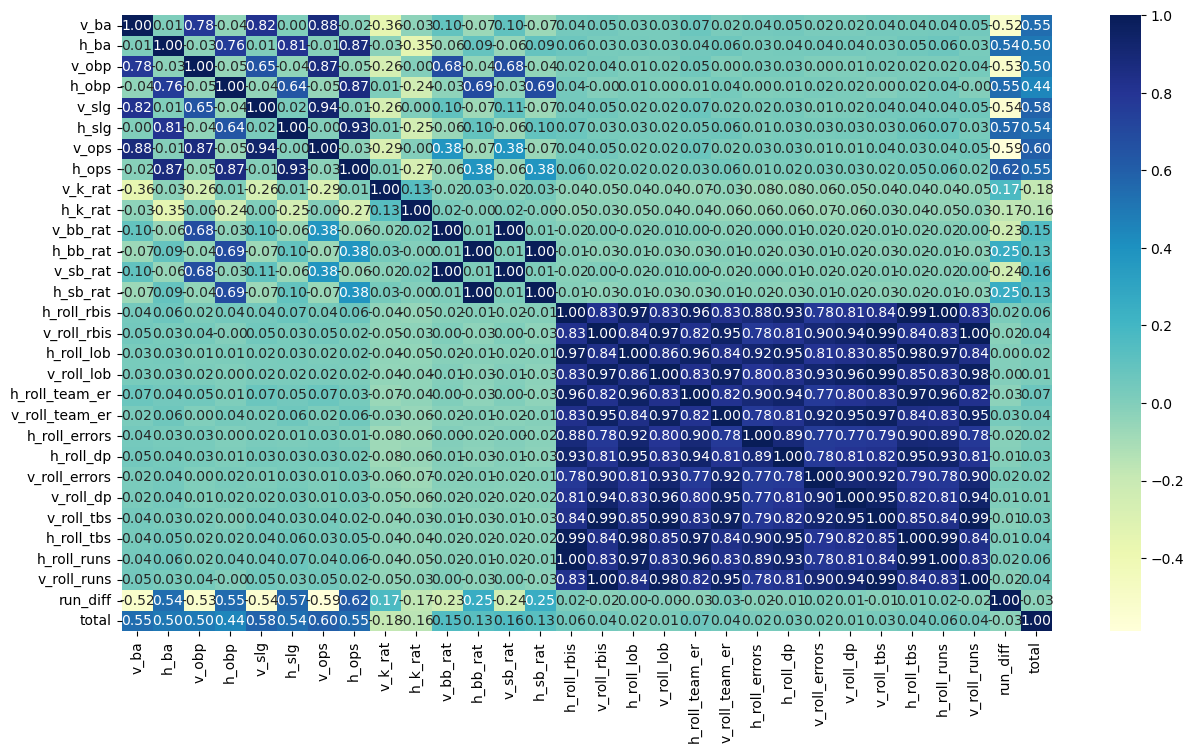

In [21]:
features = ['v_ba','h_ba','v_obp','h_obp','v_slg','h_slg','v_ops','h_ops','v_k_rat','h_k_rat','v_bb_rat','h_bb_rat','v_sb_rat','h_sb_rat', 'h_roll_rbis', 'v_roll_rbis',
            'h_roll_lob','v_roll_lob', 'h_roll_team_er', 'v_roll_team_er','h_roll_errors','h_roll_dp','v_roll_errors','v_roll_dp','v_roll_tbs','h_roll_tbs','h_roll_runs','v_roll_runs',
            'run_diff', 'total']

correlation_matrix = games[features].corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.show();

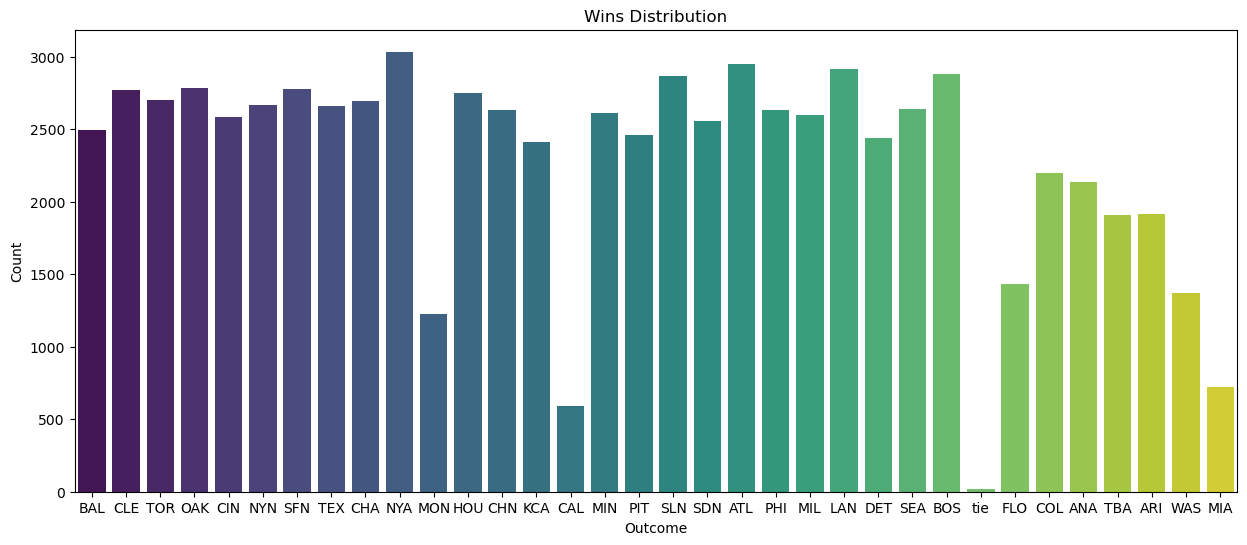

In [9]:
plt.figure(figsize=(15, 6))
sns.countplot(x='W', data=games, palette='viridis')
plt.title('Wins Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count');

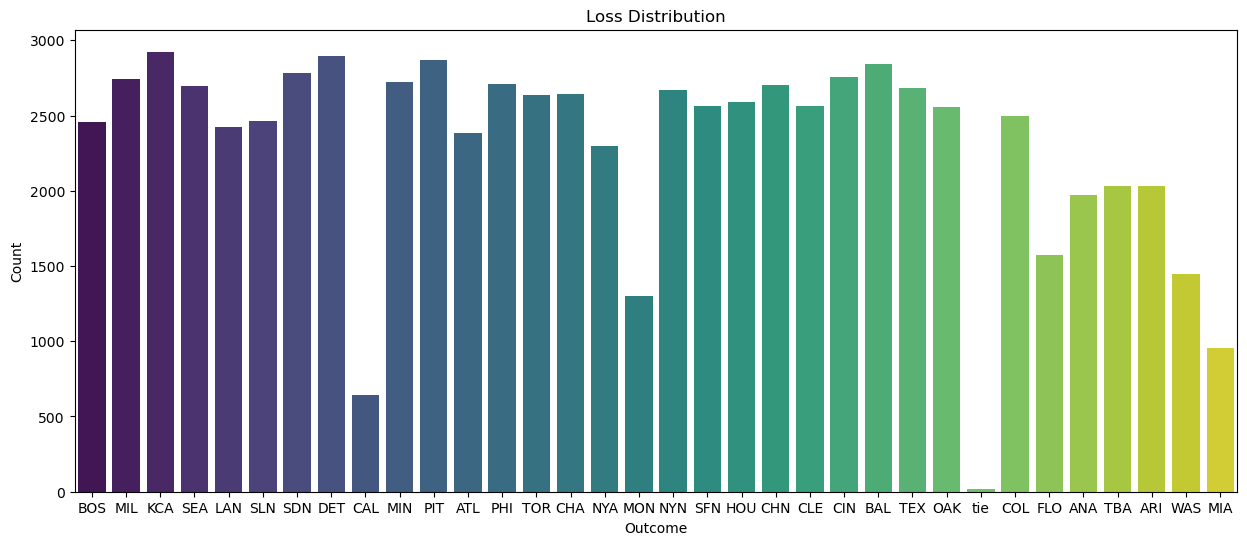

In [10]:
plt.figure(figsize=(15, 6))
sns.countplot(x='L', data=games, palette='viridis')
plt.title('Loss Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count');

In [11]:
ties = games[games['W'] == 'tie']
ties
# 9/30/2001 WOW! 90 outs, 15 innings, score ends in tie at 1-1 lol

,date,visitor_team,v_league,v_game_num,home_team,h_league,h_game_num,v_runs,h_runs,total_outs,day_night,park_id,attndnce,game_mins,v_abs,v_hits,v_2b,v_3b,v_hr,v_rbis,v_sacbunt,v_sacfly,v_hbp,v_bb,v_ibb,v_k,v_sb,v_cs,v_gidp,v_lob,v_p_used,v_ind_er,v_team_er,v_wildp,v_balk,v_putouts,v_assts,v_errors,v_passed_ball,v_dp,v_trip,h_abs,h_hits,h_2b,h_3b,h_hr,h_rbis,h_sacbunt,h_sacfly,h_hbp,h_bb,h_ibb,h_k,h_sb,h_cs,h_gidp,h_lob,h_p_used,h_ind_er,h_team_er,h_wildp,h_balk,h_putouts,h_assts,h_errors,h_passed_ball,h_dp,h_trip,vis_mngr_name,hom_mngr_name,win_pitcher_name,lose_pitch_name,sve_pitch_name,gwrbi_name,run_diff,season,total,v_1b,h_1b,v_tbs,h_tbs,h_W/L,v_W/L,W,L,h_roll_abs,h_roll_hits,h_roll_1b,h_roll_2b,h_roll_3b,h_roll_hr,h_roll_rbis,h_roll_tbs,h_roll_hbp,h_roll_bb,h_roll_ibb,h_roll_runs,h_roll_k,h_roll_sb,h_roll_cs,h_roll_lob,h_roll_p_used,h_roll_team_er,h_roll_errors,h_roll_dp,v_roll_abs,v_roll_hits,v_roll_1b,v_roll_2b,v_roll_3b,v_roll_hr,v_roll_rbis,v_roll_tbs,v_roll_hbp,v_roll_bb,v_roll_ibb,v_roll_runs,v_roll_k,v_roll_sb,v_roll_cs,v_roll_lob,v_roll_p_used,v_roll_team_er,v_roll_errors,v_roll_dp,v_ba,h_ba,v_obp,h_obp,v_slg,h_slg,v_ops,h_ops,v_k_rat,h_k_rat,v_bb_rat,h_bb_rat,v_sb_rat,h_sb_rat
614,19890528,ATL,1,49,SLN,1,46,3,3,57,0,STL09,35832.0,170,38,9,2,0,0,3,2,0,0,3,0,2,0,0,0,10,3,3,3,0,0,27,16,2,1,0,0,36,10,3,0,1,3,2,0,0,2,1,5,2,1,0,10,5,2,2,0,1,30,20,2,0,0,0,Russ Nixon,Whitey Herzog,None,None,(none),(none),0,1989,6,7,6,11,16,Tie,Tie,tie,tie,1412.0,349.0,238.0,81.0,16.0,14.0,151.0,504.0,7.0,133.0,17.0,157.0,190.0,38.0,7.0,294.0,138.0,140.0,37.0,38.0,1559.0,357.0,262.0,55.0,6.0,34.0,140.0,526.0,14.0,127.0,6.0,152.0,282.0,26.0,14.0,322.0,131.0,167.0,45.0,30.0,0.237,0.278,0.316,0.361,0.289,0.444,0.605,0.805,0.052632,0.138889,0.079,0.083,0.08,0.08
707,19890605,PIT,1,53,PHI,1,53,3,3,45,1,PHI12,17696.0,160,31,9,2,0,0,3,1,0,0,6,0,3,0,1,1,11,3,3,3,0,0,21,8,1,0,0,0,30,8,0,0,1,3,0,0,0,5,0,6,0,0,0,10,2,3,3,0,0,24,11,1,0,2,0,Jim Leyland,Nick Leyva,None,None,(none),(none),0,1989,6,7,7,11,11,Tie,Tie,tie,tie,1460.0,350.0,248.0,60.0,9.0,33.0,174.0,527.0,8.0,168.0,16.0,184.0,248.0,30.0,14.0,306.0,142.0,194.0,28.0,40.0,1651.0,391.0,274.0,74.0,16.0,27.0,175.0,578.0,7.0,150.0,25.0,193.0,277.0,46.0,24.0,316.0,132.0,199.0,45.0,30.0,0.290,0.267,0.484,0.433,0.355,0.367,0.839,0.800,0.096774,0.200000,0.194,0.167,0.19,0.17
1885,19890913,PIT,1,146,SLN,1,146,0,0,31,1,STL09,28561.0,78,17,1,1,0,0,0,0,0,0,2,0,4,0,0,1,3,1,0,0,0,0,15,7,0,0,0,0,18,4,0,0,0,0,1,0,0,1,0,2,0,0,0,5,1,0,0,0,0,16,6,1,0,1,0,Jim Leyland,Whitey Herzog,None,None,(none),(none),0,1989,0,0,4,2,4,Tie,Tie,tie,tie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059,0.222,0.176,0.278,0.118,0.222,0.294,0.500,0.235294,0.111111,0.118,0.056,0.12,0.06
9065,19930528,MON,1,47,CHN,1,45,2,2,30,0,CHI11,28523.0,102,21,7,3,1,0,2,0,0,0,3,0,6,1,1,0,7,1,1,1,0,0,15,7,1,1,0,0,18,4,0,0,0,1,0,1,0,1,0,1,0,0,0,3,1,2,2,1,0,15,5,0,0,0,0,Felipe Alou,Jim Lefebvre,None,None,(none),(none),0,1993,4,3,4,12,4,Tie,Tie,tie,tie,1509.0,434.0,312.0,71.0,11.0,40.0,189.0,647.0,5.0,110.0,12.0,198.0,235.0,29.0,12.0,309.0,167.0,188.0,31.0,42.0,1472.0,363.0,264.0,61.0,9.0,29.0,160.0,529.0,18.0,125.0,7.0,170.0,229.0,53.0,14.0,313.0,152.0,176.0,49.0,39.0,0.333,0.222,0.476,0.278,0.571,0.222,1.047,0.500,0.285714,0.055556,0.143,0.056,0.14,0.06
10715,19940406,SLN,1,3,CIN,1,3,8,8,31,0,CIN08,20179.0,128,24,9,1,0,2,7,0,1,0,4,0,3,0,0,0,5,4,6,6,1,0,15,8,3,0,2,0,23,10,1,1,0,6,0,0,1,2,0,3,0,0,2,4,3,8,8,0,0,16,5,1,0,0,0,Joe Torre,Davey Johnson,None,None,(none),(none),0,1994,16,6,8,16,13,Tie,Tie,tie,tie,707.0,192.0,138.0,33.0,3.0,18.0,89.0,285.0,7.0,80.0,8.0,103.0,131.0,22.0,7.0,152.0,68.0,73.0,13.0,16.0,754.0,197.0,136.0,37.0,2.0,22.0,88.0,304.0,7.0,98.0,7.0,96.0,143.0,15.0,13.0,183.0,94.0,107.0,18.0,15.0,0.375,0.435,0.542,0.565,0.667,0.565,1.209,1.130,0.125000,0.130435,0.167,0.087,0.17,0.09
13318,19950717,CHA,0,72,NYA,0,72,1,1,39,1,N

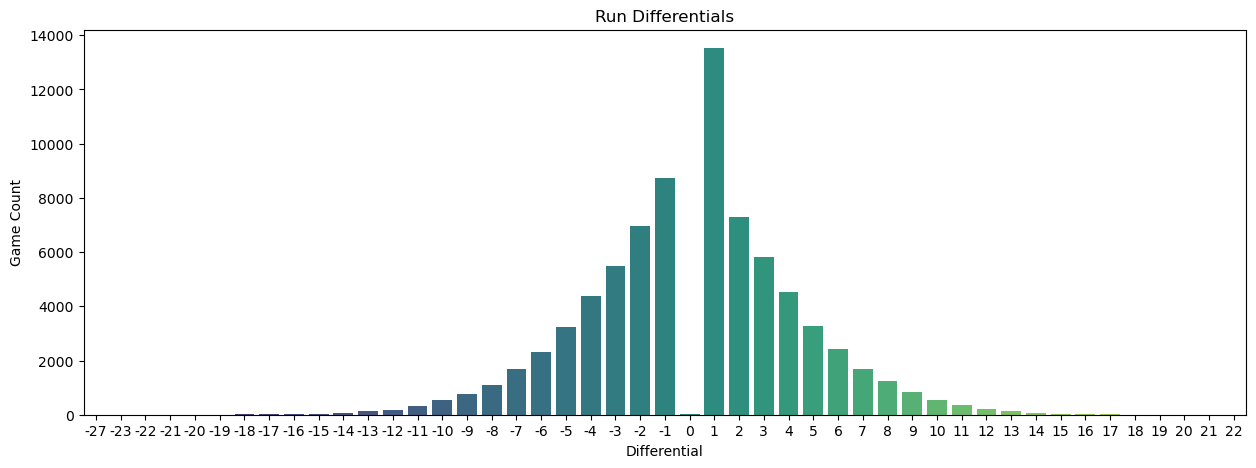

In [17]:
plt.figure(figsize=(15, 5))
sns.countplot(x='run_diff', data=games, palette='viridis')
plt.title('Run Differentials')
plt.xlabel('Differential')
plt.ylabel('Game Count');

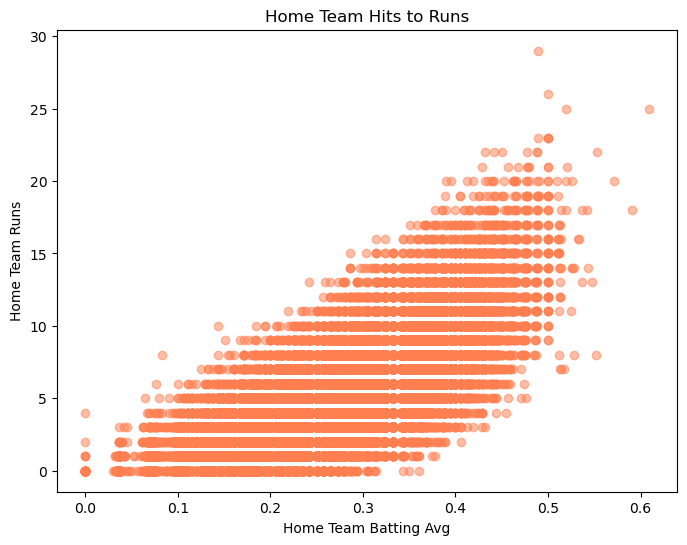

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(games['h_ba'], games['h_runs'], color='coral', alpha=0.5)
plt.title('Home Team Hits to Runs')
plt.xlabel('Home Team Batting Avg')
plt.ylabel('Home Team Runs');

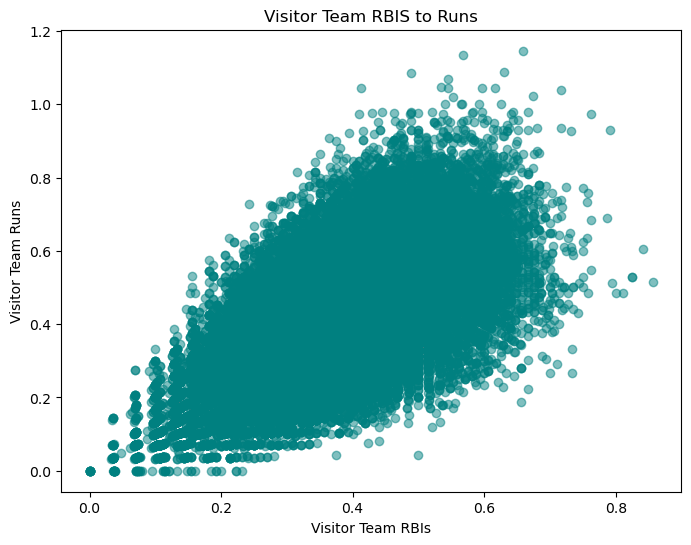

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(games['v_obp'], games['v_slg'], color='teal', alpha=0.5)
plt.title('Visitor Team RBIS to Runs')
plt.xlabel('Visitor Team RBIs')
plt.ylabel('Visitor Team Runs');

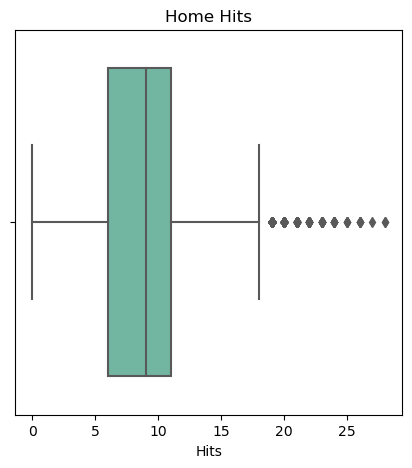

In [15]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='h_hits', data=games, palette='Set2')
plt.title('Home Hits')
plt.xlabel('Hits');

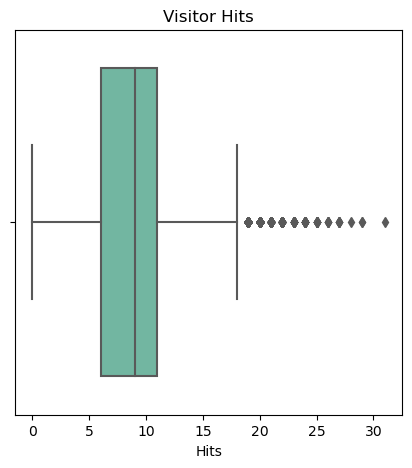

In [16]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='v_hits', data=games, palette='Set2')
plt.title('Visitor Hits')
plt.xlabel('Hits');